 working with audio and spoken language files is different to other kinds of data. First of all, unlike text or tabular data, you can't immediately see what you're working with. So many audio files often require a conversion step before you can begin working with them. And because of the frequency measure, even a few seconds of audio can contain large amounts of data. Add in background noise, other sounds, more speakers and the number of pieces of information grows even more.

#### CONVERT WAV FILES TO BYTE FORM

In [1]:
import wave
import numpy as np 

address="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/good_morning.wav"

# Create audio file wave object
good_morning = wave.open(address, 'r')

# Read all frames from wave object 
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


#### Converting sound wave bytes to integers


In [2]:
# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values in integer form
print(soundwave_gm[:10])

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11]


#### Finding the time stamps
We know the frequency of our sound wave is 48 kHz, but what if we didn't? We could find it by dividing the length of our sound wave array by the duration of our sound wave. However, Python's wave module has a better way. Calling getframerate() on a wave object returns the frame rate of that wave object.

#in this below case

Start will be 0 for the beginning of the audio file. 

Stop will be the length of our sound wave array over the framerate, or in other words, the duration.

And num will be the length of our sound wave array, since each item in the array is a sound wave value.

In [3]:

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()
print(framerate_gm)

duration=len(soundwave_gm)/framerate_gm
print(duration)

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
                      num=len(soundwave_gm))

# Print the first 10 timestamps
print(time_gm[:10])    #Each of these values is the time in seconds where each sound wave byte occurred. 

48000
5.208
[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]


#### ANOTHER METHOD TO FIND DURATION

In [4]:
import contextlib

with contextlib.closing(wave.open(address,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

2.604


### VISUALIZATION

In [5]:
address1="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/good_afternoon.wav"

# Create audio file wave object
good_afternoon = wave.open(address1, 'r')

# Read all frames from wave object 
signal_ga = good_afternoon.readframes(-1)

# View first 10 in byte form
print(signal_ga[:10])

# Convert good morning audio bytes to integers
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')

# View the first 10 sound wave values in integer form
print(soundwave_ga[:10])

b'\xb1\xff\xca\xff\xb0\xff\xcf\xff\xab\xff'
[-79 -54 -80 -49 -85 -45 -87 -51 -87 -58]


In [6]:
# Get the sound wave frame rate
framerate_ga = good_afternoon.getframerate()
print(framerate_ga)

duration1=len(soundwave_ga)/framerate_ga
print(duration)

# Find the sound wave timestamps
time_ga = np.linspace(start=0,
                      stop=len(soundwave_ga)/framerate_ga,
                      num=len(soundwave_ga))

# Print the first 10 timestamps
print(time_ga[:10])    #Each of these values is the time in seconds where each sound wave byte occurred. 

48000
2.604
[0.00000000e+00 2.08333960e-05 4.16667921e-05 6.25001881e-05
 8.33335841e-05 1.04166980e-04 1.25000376e-04 1.45833772e-04
 1.66667168e-04 1.87500564e-04]


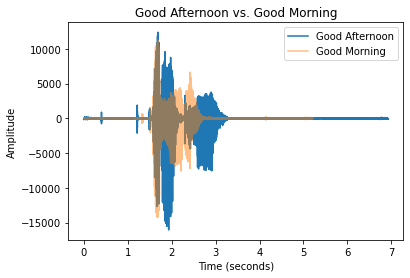

In [7]:
import matplotlib.pyplot as plt

# Setup the title and axis titles
plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot                                x=time stamp   &    y=integer form
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot
plt.plot(time_gm, soundwave_gm, label='Good Morning',
   # Set the alpha variable to 0.5 so that it becomes transaprent
   alpha=0.5)

plt.legend()
plt.show()

### SpeechRecognition library?
Automatic speech recognition is a tough challenge. And there's no shortage of companies and research institutions working on libraries to help solve it. There's the 

CMU Sphinx library by Carnegie Mellon University,

Kaldi,

SpeechRecognition

Wav2letter

In [8]:
# Importing the speech_recognition library
import speech_recognition as sr

# Create an instance of the Recognizer class
recognizer = sr.Recognizer()

# Set the energy threshold----The energy_threshold is a number between 0 and 4000 for how much the Recognizer class should listen to an audio file.
recognizer.energy_threshold = 300   #here anything below 300 is silence and above is audio



Now you've created an instance of the Recognizer class we'll use the recognize_google() method on it to access the Google web speech API and turn spoken language into text.


In [9]:

call_audio="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/clean_support_call.wav"

#now we need some preprosseing to convert it into audio data file
#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
clean_support_call = sr.AudioFile(call_audio)

# Convert AudioFile to AudioData
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source)

# Transcribe AudioData to text...................We are using googles api that is free and dont need an api key
text = recognizer.recognize_google(clean_support_call_audio,language="en-US")
print(text)



hello I want to get some help setting up my time please


Sometimes you may DO NOT want the entire audio file you're working with. The duration and offset parameters of the record() method can help with this.

After exploring your dataset, you find there's one file, imported as nothing_at_end which has 30-seconds of silence at the end and a support call file, imported as out_of_warranty has 3-seconds of static at the front.

In [10]:

thirty_audio="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/30_seconds_of_nothing_16k.wav"

#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
nothing_at_end = sr.AudioFile(thirty_audio)

# Convert AudioFile to AudioData
with nothing_at_end as source:
    nothing_at_end_audio = recognizer.record(source,       #only give 10 seconds. with offset =10 it gives first 10 seconds
                                             duration=10,
                                             offset=None)

# Transcribe AudioData to text
text = recognizer.recognize_google(nothing_at_end_audio,
                                   language="en-US")

print(text)

this Odia call has 30 seconds of nothing at the end


In [11]:
ten_audio="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/static_out_of_warranty.wav"

#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
nothing_at_end = sr.AudioFile(ten_audio)

# Convert AudioFile to AudioData
with nothing_at_end as source:
    nothing_at_end_audio = recognizer.record(source,
                                             duration=10,   
                                             offset=3)               #this does not take into consideration the first 3 sec

# Transcribe AudioData to text
text1 = recognizer.recognize_google(nothing_at_end_audio,
                                   language="en-US")

print(text1)

hello I like to get some help with my device please I think it's I want I want to do back to you


### Different kinds of audio

##### JAPANESE

In [12]:
# Create a recognizer class
recognizer = sr.Recognizer()
jap="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/japanense.wav"

#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
japanese = sr.AudioFile(jap)

# Convert AudioFile to AudioData
with japanese as source:
    japanese_audio = recognizer.record(source)  

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language="en-US",show_all=True)
# Pass the Japanese audio to recognize_google
text1 = recognizer.recognize_google(japanese_audio, language="ja")

# Print the text
print(text)

# Print the text
print(text1)

{'alternative': [{'transcript': 'mass', 'confidence': 0.04715142}, {'transcript': 'ok'}, {'transcript': 'Mars'}, {'transcript': 'mahayog'}], 'final': True}
おはようございます


##### NON SPEECH

In [13]:
# Create a recognizer class
recognizer = sr.Recognizer()
leo="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/leopard.wav"

#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
leopard = sr.AudioFile(leo)

# Convert AudioFile to AudioData
with leopard as source:
    leopard_audio = recognizer.record(source)  

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(leopard_audio, show_all=True)   #wont recogonize .also it wont show error cause of show_all

# Print the text
print(text)

[]


#### non audible human form

In [14]:
# Create a recognizer class
recognizer = sr.Recognizer()
baby="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/baby.wav"

#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
baby_talk = sr.AudioFile(baby)

# Convert AudioFile to AudioData
with baby_talk as source:
    baby_talk_audio = recognizer.record(source)  

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(leopard_audio, show_all=True)   #wont recogonize .also it wont show error cause of show_all

# Print the text
print(text)

[]


#### multiple_speakers

The problem is that multiple users voice wont be recongonised as different,they will be processed together

In [15]:
# Create a recognizer class
recognizer = sr.Recognizer()
speakers="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/multiple_speakers.wav"

#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
multiple_speakers = sr.AudioFile(speakers)

# Convert AudioFile to AudioData
with multiple_speakers as source:
    multiple_speakers_audio = recognizer.record(source)  

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(multiple_speakers_audio, language="en-US")   #wont recogonize .also it wont show error cause of show_all

# Print the text
print(text)

limitations of the speech recognition library different speakers am voices was one property tax


Deciphering between multiple speakers in one audio file is called speaker diarization. However, you've seen the free function we've been using, recognize_google() doesn't have the ability to transcribe different speakers.

One way around this, without using one of the paid speech to text services, is to ensure your audio files are single speaker.

This means if you were working with phone call data, you would make sure the caller and receiver are recorded separately. Then you could transcribe each file individually.

In this exercise, we'll transcribe each of the speakers in our multiple speakers audio file individually.

In [16]:
##################   DONT RUN THIS  #################

recognizer = sr.Recognizer()

# Multiple speakers on different files
speakers = [sr.AudioFile("speaker_0.wav"), 
            sr.AudioFile("speaker_1.wav"), 
            sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
for i, speaker in enumerate(speakers):
    with speaker as source:
        speaker_audio = recognizer.record(source)
    print(f"Text from speaker {i}:")
    print(recognizer.recognize_google(speaker_audio,
         							  language="en-US"))

    
'''
<script.py> output:
    Text from speaker 0:
    one of the limitations of the speech recognition library
    
    Text from speaker 1:
    is that it doesn't recognise different speakers and voices
    
    Text from speaker 2:
    it will just return it all as one block of text
'''

FileNotFoundError: [Errno 2] No such file or directory: 'speaker_0.wav'

#### NOISY SUPPORT CALL

In [ ]:

call_audio="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/noisy_support_call.wav"

#now we need some preprosseing to convert it into audio data file
#there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.
noisy_support_call = sr.AudioFile(call_audio)

# Convert AudioFile to AudioData
with noisy_support_call as source:
    noisy_support_call_audio = recognizer.record(source)

# Transcribe AudioData to text...................We are using googles api that is free and dont need an api key
text = recognizer.recognize_google(clean_support_call_audio,language="en-US",show_all=True)
print(text)



## PYDUB

PyDub is a Python library made by James Robert which provides a gold mine of tools for manipulating audio files. Becoming familiar with PyDub will give you a programmatic way to ensure your audio files are consistent and in an ideal format for transcription locally or through an API.

If you're working with only wav files, PyDub works out of the box. However, for file formats like mp3, you'll need ffmpeg, an open source audio library, which can be installed via ffmpeg dot org.

PyDub's AudioSegment class makes it easy to import and manipulate audio files with Python.

PyDub works with .wav files without any extra dependencies but for other file types like .mp3, you'll need to install ffmpeg.

In [ ]:
# Import AudioSegment from Pydub
from pydub import AudioSegment

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/clean_support_call.wav", 
                                  format="wav")

# Check the type
print(type(wav_file))

In [ ]:
# Import AudioSegment and play
from pydub import AudioSegment
from pydub.playback import play

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/clean_support_call.wav", 
                                  format="wav")

# Play the audio file
play(wav_file)

###### Audio parameters with PyDub
Every audio file you work with will have a number of characteristics associated with them, such as, channels, frame rate (or sample rate), sample width and more.

Knowing these parameters is useful to ensure your audio files are compatible with various API requirements for speech transcription.

For example, many APIs recommend a minimum frame rate (wav_file.frame_rate) of 16,000 Hz.

When you create an instance of AudioSegment, PyDub automatically infers these parameters from your audio files and saves them as attributes.

In this exercise, we'll explore these attributes.

In [ ]:
print(wav_file.frame_rate)

In [ ]:
# Find the number of channels
print(wav_file.channels)

In [ ]:
# Find the max amplitude
print(wav_file.max)

In [ ]:
# Find the length in milliseconds=== DURATION
print(len(wav_file))

###### Adjusting audio parameters
During your exploratory data analysis, you may find some of the parameters of your audio files differ or are incompatible with speech recognition APIs

In [ ]:
# Create a new wav file with adjusted frame rate
wav_file_16k = wav_file.set_frame_rate(16000)

# Check the frame rate of the new wav file
print(wav_file_16k.frame_rate)

In [ ]:
# Set number of channels to 1
wav_file_1_ch = wav_file.set_channels(1)

# Check the number of channels
print(wav_file_1_ch.channels)

In [ ]:
# Print sample_width
print(f"Old sample width: {wav_file.sample_width}")

# Set sample_width to 1
wav_file_sw_1 = wav_file.set_sample_width(1)

# Check new sample_width
print(f"New sample width: {wav_file_sw_1.sample_width}")

In [ ]:
# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/clean_support_call.wav", 
                                  format="wav")

play(wav_file)

# Lower the volume by 60 dB
quiet_volume_adjusted = wav_file - 60


# Play the audio file
play(quiet_volume_adjusted)

# Increase the volume by 15 dB
louder_volume_adjusted = wav_file + 100

play(louder_volume_adjusted)


Luckily, PyDub's effects module has a function called normalize() which finds the maximum volume of an AudioSegment, then adjusts the rest of the AudioSegment to be in proportion. This means the quiet parts will get a volume boost.

In [ ]:
from pydub.effects import normalize
# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/clean_support_call.wav", 
                                  format="wav")
louder_volume_adjusted = AudioSegment.from_file(file="C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/unnormalized.wav", format="wav")
# Normalize target audio file
normalized_loud_then_quiet = normalize(louder_volume_adjusted)
play(normalized_loud_then_quiet)


#### Chopping and changing audio files


In [ ]:
from pydub import AudioSegment

# Import part 1 and part 2 audio files
part_1 = AudioSegment.from_file("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/clean_support_call.wav", 
                                  format="wav")
part_2 = AudioSegment.from_file("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/baby.wav",format="wav")

# Remove the first 3 seconds of part 1
part_1_removed = part_1[3000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2

play(part_3)


#### Splitting stereo audio to mono with PyDub
If you're trying to transcribe phone calls, there's a chance they've been recorded in stereo format, with one speaker on each channel.

As you've seen, it's hard to transcribe an audio file with more than one speaker. One solution is to split the audio file with multiple speakers into single files with individual speakers.

PyDub's split_to_mono() function can help with this. When called on an AudioSegment recorded in stereo, it returns a list of two separate AudioSegment's in mono format, one for each channel.

In [ ]:

# Import AudioSegment
from pydub import AudioSegment

# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/stereo_call.wav")
print(f"Stereo number channels: {stereo_phone_call.channels}")

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]

#### Exporting and reformatting audio files
If you've made some changes to your audio files, or if they've got the wrong file extension, you can use PyDub to export and save them as new audio files.

In [85]:
from pydub import AudioSegment

# Import the .mp3 file
mp3_file = AudioSegment.from_file("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/mp3_file.mp3")

# Export the .mp3 file as wav
mp3_file.export(out_f="mp3_file.wav",
                format="wav")

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [24]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_file("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/mp3_file.mp3",format='mp3')
play(sound)

FileNotFoundError: [WinError 2] The system cannot find the file specified

#### Manipulating multiple audio files with PyDub

For this exercise, we've setup a folder which has .mp3, .m4a and .aac versions of the good-afternoon audio file.

We'll use PyDub to open each of the files and export them as .wav format so they're compatible with speech recognition APIs.

In [ ]:
# Loop through the files in the folder
for audio_file in folder:
    
	# Create the new .wav filename
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
        
    # Read audio_file and export it in wav format
    AudioSegment.from_file(audio_file).export(out_f=wav_filename, 
                                              format="wav")
        
    print(f"Creating {wav_filename}...")
    
'''<script.py> output:
    Creating good_afternoon_mp3.wav...
    Creating good_afternoon_m4a.wav...
    Creating good_afternoon_aac.wav...
    

#### An audio processing workflow
You've seen how to import and manipulate a single audio file using PyDub. But what if you had a folder with multiple audio files you needed to convert?

In this exercise we'll use PyDub to format a folder of files to be ready to use with speech_recognition.

You've found your customer call files all have 3-seconds of static at the start and are quieter than they could be.

To fix this, we'll use PyDub to cut the static, increase the sound level and convert them to the .wav extension.

In [ ]:
file_with_static = AudioSegment.from_file("account_help.mp3")


for audio_file in folder:
    file_with_static = AudioSegment.from_file(audio_file)

    # Cut the 3-seconds of static off
    file_without_static = file_with_static[3000:]

    # Increase the volume by 10dB
    louder_file_without_static = file_without_static + 10
    
    # Create the .wav filename for export
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
    
    # Export the louder file without static as .wav
    louder_file_without_static.export(wav_filename, format="wav")
    print(f"Creating {wav_filename}...")


#### Processing text transcribed from spoken language

In [20]:


# Create function to convert audio file to wav
def convert_to_wav(filename):
  """Takes an audio file of non .wav format and converts to .wav"""
  # Import audio file
  audio = AudioSegment.from_file(filename)
  
  # Create new filename
  new_filename = filename.split(".")[0] + ".wav"
  
  # Export file as .wav
  audio.export(new_filename, format="wav")
  print(f"Converting {filename} to {new_filename}...")
 


from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_file("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/acme_studio_mp3.mp3")
# Test the function
x=convert_to_wav(sound)
play(x)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [21]:
def show_pydub_stats(filename):
  """Returns different audio attributes related to an audio file."""
  # Create AudioSegment instance
  audio_segment = AudioSegment.from_file(filename)
  
  # Print audio attributes and return AudioSegment instance
  print(f"Channels: {audio_segment.channels}")
  print(f"Sample width: {audio_segment.sample_width}")
  print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
  print(f"Frame width: {audio_segment.frame_width}")
  print(f"Length (ms): {len(audio_segment)}")
  return audio_segment

# Try the function
call_1_audio_segment = show_pydub_stats("call_1.wav")

FileNotFoundError: [Errno 2] No such file or directory: 'call_1.wav'

Transcribing audio with one line
Alright, now you've got functions to convert audio files and find out their attributes, it's time to build one to transcribe them.

In this exercise, you'll build transcribe_audio() which takes a filename as input, imports the filename using speech_recognition's AudioFile class and then transcribes it using recognize_google()

In [22]:
def transcribe_audio(filename):
  """Takes a .wav format audio file and transcribes it to text."""
  # Setup a recognizer instance
  recognizer = sr.Recognizer()
  
  # Import the audio file and convert to audio data
  audio_file = sr.AudioFile(filename)
  with audio_file as source:
    audio_data = recognizer.record(source)
  
  # Return the transcribed text
  return recognizer.recognize_google(audio_data)

# Test the function
print(transcribe_audio("call_1.wav"))

FileNotFoundError: [Errno 2] No such file or directory: 'call_1.wav'

#### Analyzing sentiment of a phone call


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Let's try it on one of our phone calls
call_2_text = transcribe_audio("C:/Users/ANTHONY/Desktop/CSV&XLSX/audio_files/stereo_call.wav")

# Display text and sentiment polarity scores
print(call_2_text)
print(sid.polarity_scores(call_2_text))

how are you this is done your from AC mysterious how can I get help you can you sing what's your name in what's wrong with the device is Josh and it was seems to not donate blood save my my my father ok not me Josh what's your number your device constructed on which river bridge 1765
{'neg': 0.09, 'neu': 0.813, 'pos': 0.097, 'compound': -0.1351}


#### Classifying transcribed speech with Sklearn


Preparing audio files for text classification
Acme are very impressed with your work so far. So they've sent over two more folders of audio files.

One folder is called pre_purchase and contains audio snippets from customers who are pre-purchase, like pre_purchase_audio_25.mp3.

And the other is called post_purchase and contains audio snippets from customers who have made a purchase (post-purchase), like post_purchase_audio_27.mp3.

Upon inspecting the files you find there's about 50 in each and they're in the .mp3 format.

Acme want to know if you can build a classifier to classify future calls. You tell them you sure can.


In [ ]:
pre_purchase_audio_25
# Convert post purchase
for file in post_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)

# Convert pre purchase
for file in pre_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)


Transcribing phone call excerpts
In this exercise, we'll transcribe the audio files we converted to .wav format to text using transcribe_audio().

Since there's lots of them and there could be more, we'll build a function create_test_list() which takes a list of filenames of audio files as input and goes through each file transcribing the text.

create_test_list() uses our transcribe_audio() function we created earlier and returns a list of strings containing the transcribed text from each audio file.

pre_purchase_wav_files and post_purchase_wav_files are lists of audio snippet filenames.

In [ ]:
def create_text_list(folder):
  # Create empty list
  text_list = []
  
  # Go through each file
  for file in folder:
    # Make sure the file is .wav
    if file.endswith(".wav"):
      print(f"Transcribing file: {file}...")
      
      # Transcribe audio and append text to list
      text_list.append(transcribe_audio(file))
  return text_list

create_text_list(folder)

# Transcribe post and pre purchase text
post_purchase_text = create_text_list(post_purchase_wav_files)
pre_purchase_text = create_text_list(pre_purchase_wav_files)

# Inspect the first transcription of post purchase
print(post_purchase_text[0])

We're almost ready to build a text classifier. But right now, all of our transcribed text data is in two lists, pre_purchase_text and post_purchase_text.

To organize it better for building a text classifier as well as for future use, we'll put it together into a pandas DataFrame.

To start we'll import pandas as pd then we'll create a post purchase dataframe, post_purchase_df using pd.DataFrame().

We'll pass pd.DataFrame() a dictionary containing a "label" key with a value of "post_purchase" and a "text" key with a value of our post_purchase_text list.

We'll do the same for pre_purchase_df except with pre_purchase_text.

To have all the data in one place, we'll use pd.concat() and pass it the pre and post purchase DataFrames.

Instructions
0 XP
Create post_purchase_df using the post_purchase_text list.
Create pre_purchase_df using the pre_purchase_text list.
Combine the two DataFrames using pd.concat().



In [ ]:
import pandas as pd

# Make dataframes with the text
post_purchase_df = pd.DataFrame({"label": "post_purchase",
                                 "text": post_purchase_text})
pre_purchase_df = pd.DataFrame({"label": "pre_purchase",
                                "text": pre_purchase_text})

# Combine DataFrames
df = pd.concat([post_purchase_df, pre_purchase_df])

# Print the combined DataFrame
print(df.head())

Create a spoken language text classifier
Now you've transcribed some customer call audio data, we'll build a model to classify whether the text from the customer call is pre_purchase or post_purchase.

We've got 45 examples of pre_purchase calls and 57 examples of post_purchase calls.

The data the model will train on is stored in train_df and the data the model will predict on is stored in test_df.

Try printing the .head() of each of these to the console.

We'll build an sklearn pipeline using CountVectorizer() and TfidfTransformer() to convert our text samples to numbers and then use a MultinomialNB() classifier to learn what category each sample belongs to.

This model will work well on our small example here but for larger amounts of text, you may want to consider something more sophisticated.

In [ ]:
# Build the text_classifier as an sklearn pipeline
text_classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

# Fit the classifier pipeline on the training data
text_classifier.fit(train_df.text, train_df.label)

In [ ]:
# Build the text_classifier as an sklearn pipeline
text_classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

# Fit the classifier pipeline on the training data
text_classifier.fit(train_df.text, train_df.label)

# Evaluate the MultinomialNB model
predicted = text_classifier.predict(test_df.text)
accuracy = 100 * np.mean(predicted == test_df.label)
print(f'The model is {accuracy}% accurate')

In [4]:
a=[35, 50, 50, 50, 54, 60, 77, 248]

In [7]:
import statistics
statistics.median(a)

52.0

In [8]:

# Import stats from scipy library
from scipy import stats

  
# Interquartile range (IQR)
IQR = stats.iqr(a, interpolation = 'midpoint')
IQR

18.5

In [ ]:
1*7+2*9+3*11          1*8+2*10+3*12

4*7+5*9+6*11          4*8+5*10+6*12

In [11]:
4*7+5*9+6*11

139

In [12]:
4*8+5*10+6*12

154